Ref:https://zhuanlan.zhihu.com/p/75686587

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as ss
from matplotlib.font_manager import FontProperties   #显示中文，并指定字体

df = pd.read_csv(r'HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


查看数据是否存在缺失值以及数据类型:

In [2]:
df.info()   #查看数据是否存在缺失值以及数据类型

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15002 entries, 0 to 15001
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     15000 non-null  float64
 1   last_evaluation        15002 non-null  float64
 2   number_project         15002 non-null  int64  
 3   average_monthly_hours  15002 non-null  int64  
 4   time_spend_company     15002 non-null  int64  
 5   Work_accident          15002 non-null  int64  
 6   left                   15002 non-null  int64  
 7   promotion_last_5years  15002 non-null  int64  
 8   department             15002 non-null  object 
 9   salary                 15002 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


satisfaction_level 指的是员工对公司的满意度。

上面我们分析知该列存在空值，故先查看空值情况：

In [3]:
sl=df["satisfaction_level"]
sl[sl.isnull()]

14999   NaN
15000   NaN
Name: satisfaction_level, dtype: float64

观察发现存在两个空值，这与我们上面的分析结论一致。

下面查看这两行的全部数据

In [4]:
print(df[df["satisfaction_level"].isnull()])

       satisfaction_level  last_evaluation  number_project  \
14999                 NaN             0.52               2   
15000                 NaN        999999.00               2   

       average_monthly_hours  time_spend_company  Work_accident  left  \
14999                    158                   3              0     1   
15000                    158                   3              0     1   

       promotion_last_5years department salary  
14999                      0    support    low  
15000                      0       sale    low  


可见这两行的其他变量中last_evaluation可能存在异常。

采取删除的方式处理空值：

In [5]:
sl=sl.dropna()  #丢弃空值
print(sl.mean(),sl.std(),sl.max(),sl.min(),sl.median(),sl.skew(),sl.kurt())
print(sl.quantile(0.25), sl.quantile(0.75))        #下四分位数和上四分位数

0.6128393333333343 0.24862338135945417 1.0 0.09 0.64 -0.47643761717258093 -0.6706959323886252
0.44 0.82


由上图可知：

1） 平均满意度为0.6左右；

2） 该变量的取值范围在0~1之间；

3） 根据上、下四分位数计算上下界，覆盖到了最大、小值，所以不存在其他的异常值。这个后面再绘制箱线图更明显。

4） 偏度值（skew）为-0.476，即负偏，可见均值偏小。因中位数（0.64）大于均值，所以大部分人对公司的满意度较高 ；

5） 因为这里以正态分布的峰态系数为0作为标准，而峰度值（kurt）为-0.670在-2~2之间，所以相对于大部分正态分布而言，该变量的分布是一种比较平缓的状态。

下面通过直方图来看分布状态：

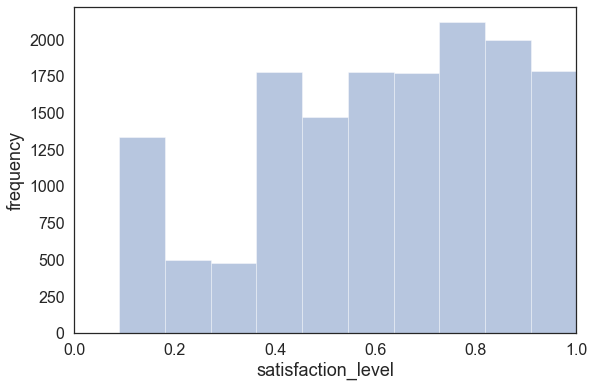

In [6]:
#直方图看分布状态

sns.set()                                            #设置seaborn默认格式
# myfont=FontProperties(fname=r'C:/Windows/Fonts/simhei.ttf',size=14)
sns.set(style="white")
plt.rcParams['axes.unicode_minus']=False             #显示负号
plt.rcParams['figure.figsize'] = (9.0, 6.0)          #调整图片大小
sns.distplot(df["satisfaction_level"],bins=10, kde=False)
plt.xticks(fontsize=16)                             #设置x轴刻度值的字体大小
plt.yticks(fontsize=16)                             #设置y轴刻度值的字体大小
plt.xlabel('satisfaction_level' ,fontsize=18)       #设置x轴刻度值的字体大小
plt.ylabel('frequency' ,fontsize=18)                     #设置x轴刻度值的字体大小
plt.xlim(0, 1)
plt.show()

上图可见直方图是左偏，大多数人的满意度在均值（0.61）以上，即对公司满意度高。

最后通过箱线图查看员工满意度与是否离职的关系：

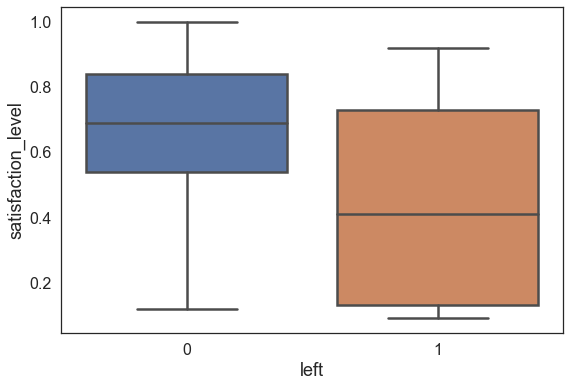

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure()
ax = sns.boxplot(x="left", y="satisfaction_level",
                  data=df, linewidth=2.5)
plt.xticks(fontsize=16)                             #设置x轴刻度值的字体大小
plt.yticks(fontsize=16)                             #设置y轴刻度值的字体大小
plt.xlabel('left' ,fontsize=18)                     #设置x轴刻度值的字体大小
plt.ylabel("satisfaction_level",fontsize=18)        #设置x轴刻度值的字体大小
plt.show()

图中可以看出，

1）用中位数来做比较，未离职员工（left = 0）对公司的满意度远远高于离职员工（left = 1）对公司的满意度；

2）没有超出四分位数上下界的异常值。



（3）last_evaluation 分析


查看常见统计项：

In [8]:
le = df["last_evaluation"]
print(le.mean(),le.std(),le.median(),le.max(),le.min(),le.skew(),le.kurt())   

67.37373216904412 8164.407523745649 0.72 999999.0 0.36 122.48265175204614 15001.999986807796


上述结果反映了以下问题：

1） 上次绩效评估（last_evaluation）的取值范围本来应该是0~1，但这里均值却是67.37，同时标准差达到了8164.41，说明数据分布很不正常；

2）最大值为999999，说明存在超大的异常值点；

3）偏度（skew）为122.48，说明均值是极度正偏，数据的大部分值是小于均值的；

4）峰度（kurt）15001，显然大于2，说明这个分布图形很尖。

按常识last_evalutaion的取值范围在0~1，这里最小值是0.36（见上图），所以我们针对上述问题，查看大于1的数据：

In [9]:
print(le[le>1])

15000    999999.0
Name: last_evaluation, dtype: float64


In [10]:
le = le[le<1]   # 删除这条异常样本
# 删除异常值后再看统计项
print(le.mean(),le.std(),le.max(),le.min(),le.median(),le.skew(),le.kurt())
print(le.quantile(0.25), le.quantile(0.75))        #下四分位数和上四分位数

0.7106080989264753 0.1681893101599776 0.99 0.36 0.71 -0.02361339247588647 -1.2394488894910836
0.56 0.86


输出值显示统计项无明显异常，同时可知平均绩效是0.71，变量取值范围是0.36~0.99。

通过直方图看分布：

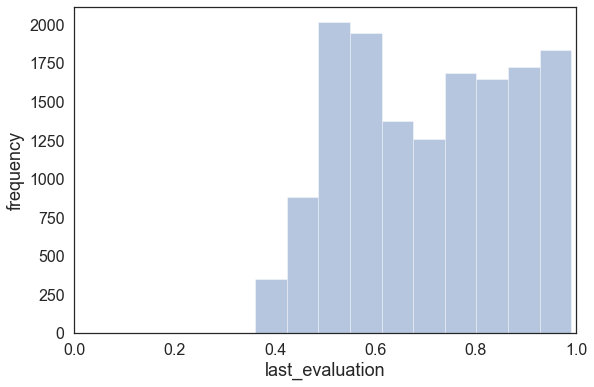

In [11]:
#直方图看分布状态

sns.set()                                            #设置seaborn默认格式
sns.set( style="white")
plt.rcParams['axes.unicode_minus']=False             #显示负号
plt.rcParams['figure.figsize'] = (9.0, 6.0)          #调整图片大小
sns.distplot(le, bins=10, kde=False)
plt.xticks(fontsize=16)                             #设置x轴刻度值的字体大小
plt.yticks(fontsize=16)                             #设置y轴刻度值的字体大小
plt.xlabel('last_evaluation' ,fontsize=18)       #设置x轴刻度值的字体大小
plt.ylabel('frequency' ,fontsize=18)                     #设置x轴刻度值的字体大小
plt.xlim(0, 1)
plt.show()

最后通过箱线图看上次绩效评估（last_evaluation）与是否离职（left）的关系：

/Users/george/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


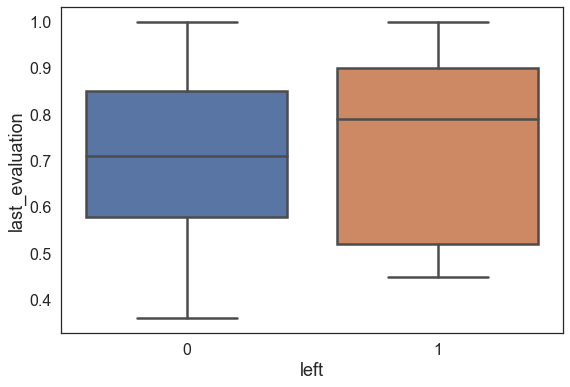

In [12]:
plt.figure()
df = df[df["satisfaction_level"]<=1][df["salary"]!="nme"]   #去除异常值
ax = sns.boxplot(x="left", y="last_evaluation", data=df, linewidth=2.5)
plt.xticks(fontsize=16)                             #设置x轴刻度值的字体大小
plt.yticks(fontsize=16)                             #设置y轴刻度值的字体大小
plt.xlabel('left' ,fontsize=18)                     #设置x轴刻度值的字体大小
plt.ylabel("last_evaluation",fontsize=18)           #设置x轴刻度值的字体大小
plt.show()

上图结果显示，离职人员的上次绩效评估（last_evaluation）高于未离职人员，但差距不明显。有可能离职人员存在打分偏高。所以我们初步判断上次绩效评估（last_evaluation）与是否离职关系不大。

（4）number_project 变量分析


查看常见统计项：

In [13]:
n_p = df["number_project"]
print(n_p.mean(),n_p.std(),n_p.max(),n_p.min(),n_p.median(),n_p.skew(),n_p.kurt())
print(n_p.quantile(0.25), n_p.quantile(0.75))        #下四分位数和上四分位数

3.80305353690246 1.2325923553183857 7 2 4.0 0.3377056123598222 -0.4954779519008947
3.0 5.0


由上图可知：
1) 项目数量（number_project）取值范围是2~7，均值是3.8。

2） 偏度为0.33，说明均值稍微正偏；峰度为-0.49，说明变量的分布比较平缓。

查看各个项目的分布情况：

In [14]:
print(n_p.value_counts(normalize=True).sort_index())   #normalize=True表示计算占比

2    0.159211
3    0.270351
4    0.291019
5    0.184079
6    0.078272
7    0.017068
Name: number_project, dtype: float64


可见4个项目的人数占比是最多的，达到总人数的29.1%；其次是3的项目的人数占比，为27.0%；做7个项目的人数最少，只有1.7%。

上述分析占比也可通过饼图来实现：

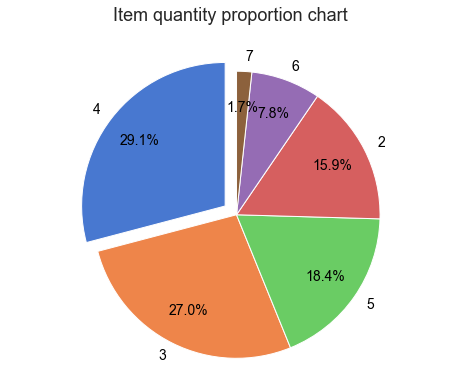

In [15]:
sns.set(style="white")
plt.rcParams['figure.figsize'] = (8.0, 6.0)   #调整图片大小
data = n_p.value_counts(normalize=True)
lbs= data.index
explodes=[0.1 if i==4 else 0 for i in lbs]
plt.pie(data, explode=explodes,labels=lbs, autopct="%1.1f%%",
                                colors=sns.color_palette("muted"),startangle = 90,pctdistance = 0.75,
          textprops={'fontsize':14,'color':'black'})    #%%表示输出百分号本身
plt.axis('equal')  # 设置x，y轴刻度一致，以使饼图成为圆形。
plt.title('Item quantity proportion chart\n', fontsize=18)
plt.show()

饼图可见：4个项目的人员最多，达29.1%，7个项目的人员最少，只有1.7%。

最后也通过堆积柱状图查看项目数量（number_project）与是否离职（left）的关系：

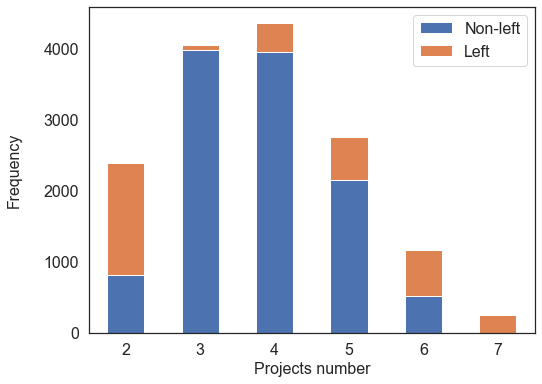

In [16]:
sns.set(style='white')
plt.rcParams['axes.unicode_minus']=False             #显示负号
plt.rcParams['figure.figsize'] = (8.0, 6.0)          #调整图片大小
sns.set_palette(sns.color_palette('deep'))           #设置调色板
#pal_style = ['deep', 'muted', 'pastel', 'bright', 'dark','colorblind']
np_left = pd.crosstab(index=df['number_project'], columns=df['left'])
np_left.plot(kind='bar', stacked = True)
plt.xticks(fontsize=16, rotation=0)                 #设置x和y轴刻度值的字体大小
plt.yticks(fontsize=16)                             #设置y轴刻度值的字体大小
plt.legend(['Non-left', 'Left'], fontsize=16)         #设置legend刻度值的字体大小
plt.xlabel('Projects number', fontsize=16)
plt.ylabel('Frequency\n', fontsize=16)
plt.show()

对上图分析如下：
1）参与7个项目的员工全部离职。

2）除参加2个项目的情况外，其他则随着项目数量的增加，离职率逐渐升高。



（5）average_monthly_hours（平均每月工作时长）变量分析



查看常见统计项：

In [17]:
amh = df['average_monthly_hours']
print(amh.mean(),amh.std(),amh.max(),amh.min(),amh.median(),amh.skew(),amh.kurt())
print(amh.quantile(0.25), amh.quantile(0.75))        #下四分位数和上四分位数

201.0503366891126 49.943099371284305 310 96 200.0 0.0528419894163242 -1.1349815681924558
156.0 245.0


分析以上输出结果：

1）平均工作时长的均值为201小时，取值范围为96~310（小时）；

2）偏度（skew）为0.05，稍微正偏；

3）峰度（kurt）为-1.13，在-2~2之间，说明分布比较平缓。

4）根据上、下四分位数，可知上界、下界覆盖了全部的变量取值。故这里没有异常值。

通过直方图看分布：

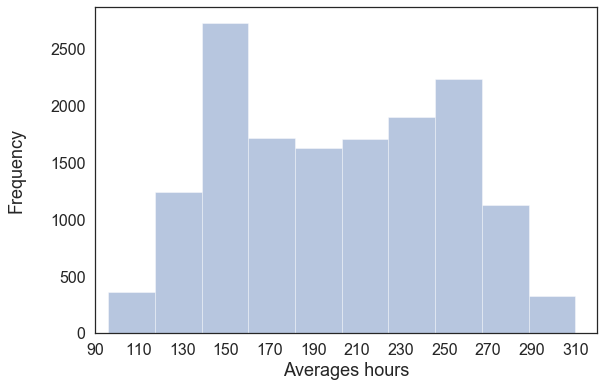

In [18]:
#直方图看分布状态
sns.set()                                            #设置seaborn默认格式

sns.set(style="white")
plt.rcParams['axes.unicode_minus']=False             #显示负号
ax = plt.figure(figsize=(9.0, 6.0))          #调整图片大小
sns.distplot(df['average_monthly_hours'], bins=10, kde=False)
plt.xticks(ticks= np.arange(90, 320, step=20),fontsize=16)                             #设置x轴刻度值的字体大小
plt.yticks(fontsize=16)                             #设置y轴刻度值的字体大小
plt.xlabel('Averages hours' ,fontsize=18)       #设置x轴刻度值的字体大小
plt.ylabel('Frequency\n' ,fontsize=18) #设置x轴刻度值的字体大小
plt.xlim(90, 320)
plt.show()

上图可见总体分布平缓，大部分分布在140~270个小时之间。

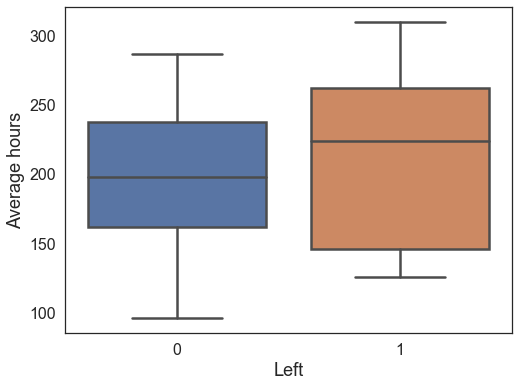

In [19]:
plt.figure()
ax = sns.boxplot(x="left", y="average_monthly_hours",
                  data=df, linewidth=2.5)
plt.xticks(fontsize=16)                             #设置x轴刻度值的字体大小
plt.yticks(fontsize=16)                             #设置y轴刻度值的字体大小
plt.xlabel('Left' ,fontsize=18)                     #设置x轴刻度值的字体大小
plt.ylabel("Average hours",fontsize=18)      #设置x轴刻度值的字体大小
plt.show()

由上图可见，离职人员的平均工作时长（以中位数计）高于未离职人员，进一步编程查看知高出约26小时/月。

（6）工作年限（time_spend_company）变量分析

查看常见统计项：

In [20]:
tsc = df['time_spend_company']
print(tsc.mean(),tsc.std(),tsc.max(),tsc.min(),tsc.median(),tsc.skew(),tsc.kurt())
print(tsc.quantile(0.25), tsc.quantile(0.75))        #下四分位数和上四分位数

3.498233215547703 1.4601362305354546 10 2 3.0 1.8533190474339154 4.773210725010069
3.0 4.0


根据以上输出可知：

1）工作年限（time_spend_company）的均值约为3.5年，其取值范围是2~10年；

2）偏度值1.85，说明均值右偏，即大部分值小于均值（中位数小于均值）；

3) 峰度值为4.77，说明这不是一个正态分布（正态分布的峰度值在-2~2之间），而且它的分布图形很尖；

下面通过直方图来进一步查看该变量的分布：

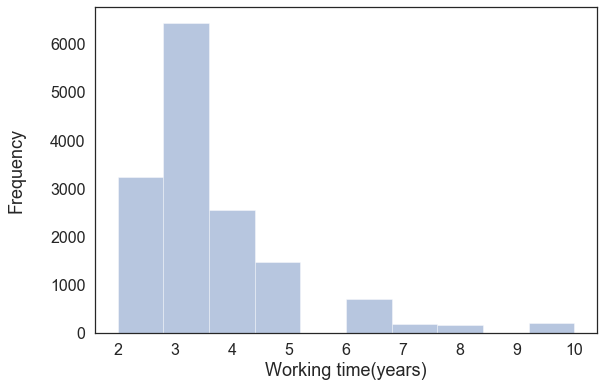

In [21]:
#直方图看分布状态
sns.set()                                            #设置seaborn默认格式
sns.set(style="white")
plt.rcParams['axes.unicode_minus']=False             #显示负号
ax = plt.figure(figsize=(9.0, 6.0))                  #调整图片大小
sns.distplot(df['time_spend_company'], bins=10, kde=False)
plt.xticks(fontsize=16)                             #设置x轴刻度值的字体大小
plt.yticks(fontsize=16)                             #设置y轴刻度值的字体大小
plt.xlabel('Working time(years)' ,fontsize=18)             #设置x轴刻度值的字体大小
plt.ylabel('Frequency\n' ,fontsize=18)                   #设置y轴刻度值的字体大小
plt.show()

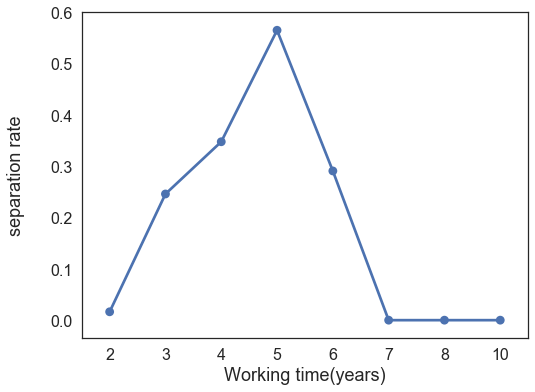

In [22]:
# 通过折线图看工作年限与离职率的关系：
#点线图（折线图）
sns.set()                                            #设置seaborn默认格式
sns.set(style="white")
plt.rcParams['axes.unicode_minus']=False             #显示负号
plt.figure()                                         #调整图片大小
sub_df = df.groupby('time_spend_company').mean()
sns.pointplot(sub_df.index, sub_df['left'])
plt.xticks(fontsize=16)                             #设置x轴刻度值的字体大小
plt.yticks(fontsize=16)                             #设置y轴刻度值的字体大小
plt.xlabel('Working time(years)' ,fontsize=18)                 #设置x轴刻度值的字体大小
plt.ylabel('separation rate\n' ,fontsize=18)                  #设置x轴刻度值的字体大小
plt.show()

上图说明：

1）工作5年的离职率最高，所以人力部门应当尤其关注这些员工；

2）从2~5年的工作年限来看，随着工作年限的增加，离职率升高；

3）从5~10年的工作年限来看，随着工作年限的增加，离职率降低。这反映了老员工的稳定性。

最后通过箱线图对比离职和不离职人员的工作年限：

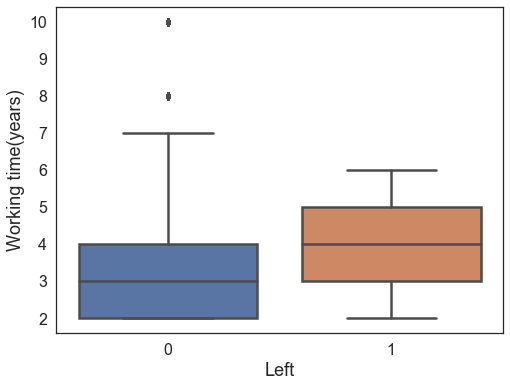

In [23]:
plt.figure()
ax = sns.boxplot(x="left", y="time_spend_company",
                  data=df, linewidth=2.5)
plt.xticks(fontsize=16)                             #设置x轴刻度值的字体大小
plt.yticks(fontsize=16)                             #设置y轴刻度值的字体大小
plt.xlabel('Left' ,fontsize=18)             #设置x轴刻度值的字体大小,离职
plt.ylabel('Working time(years)' ,fontsize=18)             #设置y轴刻度值的字体大小
plt.show()

上图反映了：离职人员的工作年限平均水平（以中位数计）比不离职人员高，高大概1年左右；

图中还可看到不离职人员有部分员工的工作年限分别达到8年和10年。

（7）“是否发生工作事故“（Work_accident）变量分析



因为Work_accident是0-1变量，0代表没有发生工作事故，1代表发生工作事故。所以这里不看统计项，直接用value_counts看分布:

In [24]:
wa = df['Work_accident']
print(wa.value_counts(normalize=True).sort_index())

0    0.85539
1    0.14461
Name: Work_accident, dtype: float64


可见在总人数中，不发生事故占大多数，为85.54%；剩下发生事故的占14.46%。

查看发生事故与否对离职率带来的变化：

In [25]:
data_ =  df[["Work_accident", "left"]]
data_0 = data_[data_["Work_accident"]==0]
data_1 = data_[data_["Work_accident"]==1]
df_0 = data_0["left"].value_counts(normalize=True).sort_index()
df_1 = data_1['left'].value_counts(normalize=True).sort_index()
res = pd.concat([df_0,df_1],axis=1)
res.columns = ['不发生事故', '发生事故']  
res.index = ['未离职率', '离职率']
res

,不发生事故,发生事故
未离职率,0.73484,0.922084
离职率,0.26516,0.077916


这里不发生事故的离职率为26.53%，高于发生事故的离职率“7.79%”。

（8）promotion_last_5years（5年内是否升职）变量分析

变量是0-1变量，0代表过去5年未升职，1代表升职。

首先查看有无空值：

In [26]:
pl5 = df["promotion_last_5years"]
pl5[pl5.isnull()]

Series([], Name: promotion_last_5years, dtype: int64)

输出为空，说明不存在空值.
接着查看变量的分布：

In [27]:
print(pl5.value_counts(normalize=True).sort_index())

0    0.978732
1    0.021268
Name: promotion_last_5years, dtype: float64


结果显示，过去5年升职的占2.13%，未升职的占97.87%。可见只有少部分人得到晋升。

查看过去5年升职和未升职给离职率带来的变化：

In [28]:
data_ =  df[["promotion_last_5years", "left"]]
data_0 = data_[data_['promotion_last_5years']==0]
data_1 = data_[data_['promotion_last_5years']==1]
df_0 = data_0['left'].value_counts(normalize=True).sort_index()
df_1 = data_1['left'].value_counts(normalize=True).sort_index()
res = pd.concat([df_0,df_1],axis=1)
res.columns = ['过去5年未升职员工', '过去5年升职员工']  
res.index = ['未离职率', '离职率']
res


,过去5年未升职员工,过去5年升职员工
未离职率,0.758038,0.940439
离职率,0.241962,0.059561


由图可知，5年内升职员工的离职率（5.96%）要低于5年内未升职员工的离职率（24.21%）。

（9）department（所属部门）变量分析

查看各部门的人数占比：

In [29]:
d = df['department']
print(d.value_counts(normalize=True))

sales          0.276018
technical      0.181345
support        0.148610
IT             0.081805
product_mng    0.060137
marketing      0.057204
RandD          0.052470
accounting     0.051137
hr             0.049270
management     0.042003
Name: department, dtype: float64


下面通过饼图更形象的查看各部门人数占比（分布）：

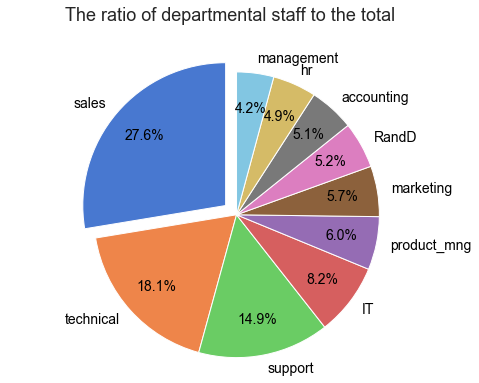

In [30]:
plt.rcParams['figure.figsize'] = (8.0, 6.0)   #调整图片大小
data = d.value_counts(normalize=True)
lbs= data.index
explodes=[0.1 if i=="sales" else 0 for i in lbs ]
plt.pie(data, explode = explodes,labels=lbs, autopct="%1.1f%%",
                                colors=sns.color_palette("muted"),startangle = 90,pctdistance = 0.75,
          textprops={'fontsize':14, 'color':'black'})
plt.axis('equal')  # 设置x，y轴刻度一致，以使饼图成为圆形。
plt.title('The ratio of departmental staff to the total\n', fontsize=18)
plt.show()

上图显示：部门‘sales’所占人数最多，达27.6%；部门‘management’最少，仅占总人数的4.2%。

最后画折线图看各个部门的离职率：

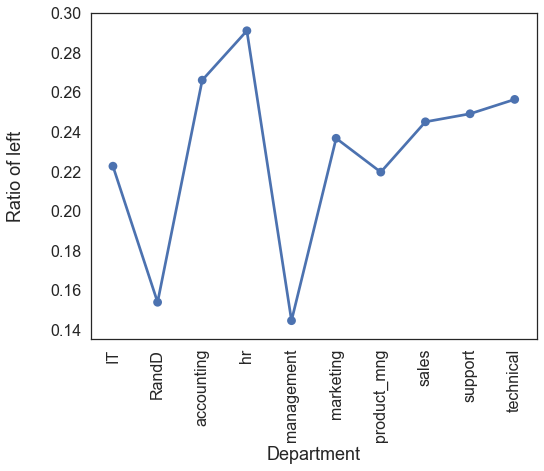

In [31]:
#点线图（折线图）
sns.set()                                                 #设置seaborn默认格式
sns.set(style="white")
plt.rcParams['axes.unicode_minus']=False                  #显示负号
plt.figure()                                              #调整图片大小
df_ = df.drop(labels=df[df['department']=='sale'].index)  #删除department值为‘sale’的样本
sub_df = df_.groupby('department').mean()
sns.pointplot(sub_df.index, sub_df['left'])
plt.xticks(fontsize=16, rotation=90)                      #设置x轴刻度值的字体大小
plt.yticks(fontsize=16)                                   #设置y轴刻度值的字体大小
plt.xlabel('Department' ,fontsize=18)                           #设置x轴刻度值的字体大小
plt.ylabel('Ratio of left\n' ,fontsize=18)                       #设置x轴刻度值的字体大小
plt.show()

上图显示：离职率最高的是‘hr’部门，最低的是‘management’，这一点需要我们注意。



（10）salary（薪资水平）变量分析



统计变量各个值的分布：

In [32]:
s = df['salary']
s.value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

再用value_counts()统计一次占比，输出：

也就是说，salary变量一共有三个值，分别是'low'，‘medium’，‘high’。其中‘low’水平薪资的人最多，‘high’水平薪资的人最少。

最后用折线图看看不同薪资水平的离职率：

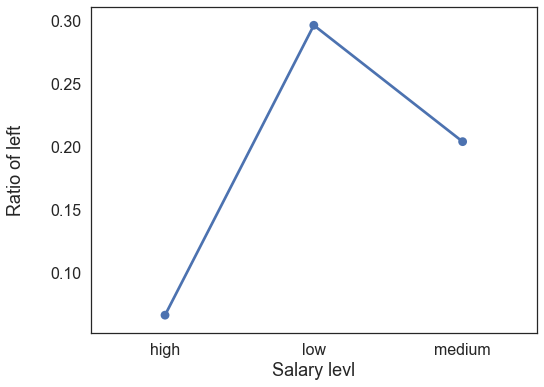

In [33]:
#点线图（折线图）
sns.set()                                                 #设置seaborn默认格式
sns.set(style="white")
plt.rcParams['axes.unicode_minus']=False                  #显示负号
plt.figure()                                              #调整图片大小
#df_ = df.drop(labels=df[df['salary']=='nme'].index)      #删除salary值为‘nme’的样本
df_ = df[df['salary']!='nme']                             #同上，删除salary值为‘nme’的样本
sub_df = df_.groupby('salary').mean()
sns.pointplot(sub_df.index, sub_df['left'])
plt.xticks(fontsize=16)                                   #设置x轴刻度值的字体大小
plt.yticks(fontsize=16)                                   #设置y轴刻度值的字体大小
plt.xlabel('Salary levl' ,fontsize=18)                       #设置x轴刻度值的字体大小
plt.ylabel('Ratio of left\n' ,fontsize=18)                       #设置x轴刻度值的字体大小
plt.show()

上图结果显示：‘low’薪资水平的人，离职率最高；‘high’薪资水平的人离职率最低。



6.多因子探索分析


（1）交叉分析检验部门两两之间的离职率是否有显著差异性

采用的方法是独立t检验方法。基本思路是提取各个部门的离职分布，然后求它们两两之间的独立t检验统计量，或求出p值来检验。

先简单介绍独立t检验的主要思想：

两独立样本t检验的原假设是两总体均值相等，即H0:u1=u2。然后看在指定的显著性水平a下，p值与a的关系：若p<a,则拒绝原假设，认为两总体的均值不相等，也可以说两个分布有显著差异。否则认为两分布没有显著差异。

下面检验部门两两之间的离职率是否有显著差异，代码如下：

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 <a list of 10 Text yticklabel objects>)

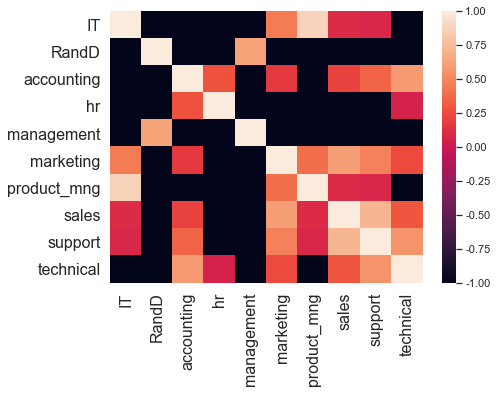

In [34]:

dp_indices = df.groupby(by="department").indices
plt.rcParams['figure.figsize'] = (7.0, 5.0)                      #调整图片大小
dp_keys = list(dp_indices.keys())
dp_t_mat = np.zeros([len(dp_keys), len(dp_keys)])
for i in range(len(dp_keys)):
    for j in range(len(dp_keys)):
        p_value = ss.ttest_ind(df['left'].iloc[dp_indices[dp_keys[i]]].values,
                              df['left'].iloc[dp_indices[dp_keys[j]]].values)[1]
        if p_value < 0.05:                                    #黑色说明两部门之间的离职率有显著差异（拒绝原假设），
            dp_t_mat[i][j] = -1                               #其他颜色说明两部门之间的离职率没有显著差异      
                                                    
        else:  
            dp_t_mat[i][j] = p_value
sns.heatmap(dp_t_mat, xticklabels=dp_keys, yticklabels=dp_keys)
plt.xticks(fontsize=16, rotation=90)                         #设置x和y轴刻度值的字体大小
plt.yticks(fontsize=16)                                      #设置y轴刻度值的字体大小

上图黑色部分说明两部门之间的离职率有显著差异（拒绝原假设），其他颜色说明两部门之间的离职率没有显著差异。比如说，‘sales’部门和‘management’部门之间的离职率有显著差异性，而‘sales’部门和‘marketing’部门之间的离职率没有显著差异性。

（2）由交叉分析的透视表看离职率（left）与一个或几个自变量的关系之间的关系

交叉分析所涉及到的分析方法比较多，除了像上面第（1）部分用假设检验的方法来判断两个属性之间是否有联系之外，还可以直接以一个或几个属性为行，另一个或几个属性为列做成一张透视表。这样，通过关注这张新生成的表的性质，可以更直观的分析两个属性或者几个属性之间的关系。

下面先看离职率（left）和（薪资水平）salary、过去5年是否升职（promotion_last_5years）、 是否发生工作事故（Work_accident）三个自变量之间的关系：

In [35]:
piv_tb = pd.pivot_table(df, values='left', index=['salary', 'promotion_last_5years'],\
                       columns=['Work_accident'], aggfunc=np.mean)
piv_tb

Work_accident                        0         1
salary promotion_last_5years                    
high   0                      0.082996  0.000000
       1                      0.000000  0.000000
low    0                      0.331728  0.090020
       1                      0.229167  0.166667
medium 0                      0.230683  0.081655
       1                      0.028986  0.023256

上图发现，值得注意薪资水平（salary）为‘low’，过去5年未升职（promotion_last_5years），且没有发生工作事故（Work_accident）的人平均离职率（以平均水平计算）最高，达33.2%。

倘若觉得上图不够直观，还可用热力图显示，代码如下：

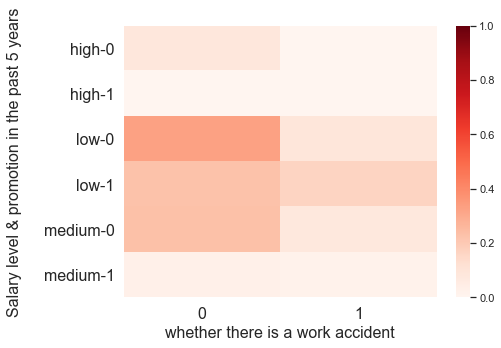

In [36]:
sns.set(style='white')
plt.rcParams['axes.unicode_minus']=False             #显示负号
plt.rcParams['figure.figsize'] = (7.0, 5.0)                      #调整图片大小
piv_tb = pd.pivot_table(df, values='left', index=['salary', 'promotion_last_5years'],\
                       columns=['Work_accident'], aggfunc=np.mean)
sns.heatmap(piv_tb, vmin=0, vmax=1, cmap=sns.color_palette('Reds', n_colors=256))
sns.set_context(font_scale=4.5)
plt.xticks(fontsize=16, rotation=0)                          #设置x轴刻度值的字体大小
plt.yticks(fontsize=16, rotation=0)                          #设置y轴刻度值的字体大小
plt.xlabel('whether there is a work accident', fontsize=16)
plt.ylabel('Salary level & promotion in the past 5 years\n', fontsize=16)
plt.show()

In [37]:
# 考虑图像太大，截取部分输出如下：
piv_tb=pd.pivot_table(df, values="left", 
                      index=["department", "salary"], 
                      columns=["time_spend_company"],aggfunc=np.mean)
piv_tb

time_spend_company        2         3         4         5         6    7   \
department  salary                                                          
IT          high    0.000000  0.054054  0.000000  0.333333  0.000000  NaN   
            low     0.000000  0.284091  0.394737  0.625000  0.259259  0.0   
            medium  0.033058  0.171171  0.352273  0.452830  0.000000  0.0   
RandD       high    0.000000  0.120000  0.125000  0.000000  0.000000  NaN   
            low     0.012048  0.140127  0.163934  0.475000  0.176471  NaN   
            medium  0.011364  0.125786  0.301587  0.526316  0.083333  NaN   
accounting  high    0.000000  0.114286  0.100000  0.000000  0.000000  NaN   
            low     0.000000  0.277108  0.386364  0.485714  0.200000  NaN   
            medium  0.046154  0.313433  0.419355  0.589744  0.315789  NaN   
hr          high    0.000000  0.200000  0.272727       NaN  0.000000  NaN   
            low     0.000000  0.290909  0.411765  0.486486  0.454545  NaN   
            medium  0.000000  0.418301  0.450000  0.473684  0.275862  NaN   
management  high    0.000000  0.000000  0.055556  0.000000  0.000000  0.0   
            low     0.000000  0.390244  0.437500  0.687500  0.285714  NaN   
            medium  0.027027  0.096386  0.414634  0.250000  0.000000  0.0   
marketing   high    0.000000  0.230769  0.000000  0.000000  0.000000  NaN   
            low     0.000000  0.328042  0.451613  0.636364  0.576923  0.0   
            medium  0.000000  0.227273  0.147059  0.588235  0.150000  0.0   
product_mng high    0.000000  0.133333  0.222222  0.000000  0.000000  0.0   
            low     0.000000  0.219780  0.333333  0.545455  0.666667  0.0   
            medium  0.000000  0.252874  0.215385  0.647059  0.368421  0.0   
sales       high    0.000000  0.029126  0.097561  0.500000  0.000000  0.0   
            low     0.033259  0.365962  0.417143  0.677165  0.402299  0.0   
            medium  0.023873  0.190601  0.269091  0.451852  0.164557  0.0   
support     high    0.000000  0.067797  0.050000  0.272727  0.000000  NaN   
            low     0.022523  0.352031  0.466667  0.600000  0.568966  NaN   
            medium  0.024000  0.140704  0.208054  0.568182  0.333333  NaN   
technical   high    0.000000  0.137255  0.093750  0.444444  0.000000  NaN   
            low     0.003333  0.256849  0.466912  0.606299  0.306667  NaN   
            medium  0.028226  0.212632  0.394366  0.635659  0.303030  0.0   

time_spend_company   8    10  
department  salary            
IT          high    NaN  NaN  
            low     0.0  0.0  
            medium  0.0  0.0  
RandD       high    0.0  NaN  
            low     0.0  NaN  
            medium  NaN  NaN  
accounting  high    0.0  NaN  
            low     0.0  0.0  
            medium  0.0  0.0  
hr          high    NaN  NaN  
            low     NaN  NaN  
            medium  0.0  NaN  
management  high    0.0  0.0  
            low     NaN  0.0  
            medium  0.0  0.0  
marketing   high    0.0  0.0  
            low     0.0  0.0  
            medium  0.0  0.0  
product_mng high    NaN  0.0  
            low     0.0  0.0  
            medium  0.0  0.0  
sales       high    NaN  0.0  
            low     0.0  0.0  
            medium  0.0  0.0  
support     high    NaN  0.0  
            low     0.0  0.0  
            medium  0.0  0.0  
technical   high    NaN  0.0  
            low     0.0  0.0  
            medium  0.0  0.0

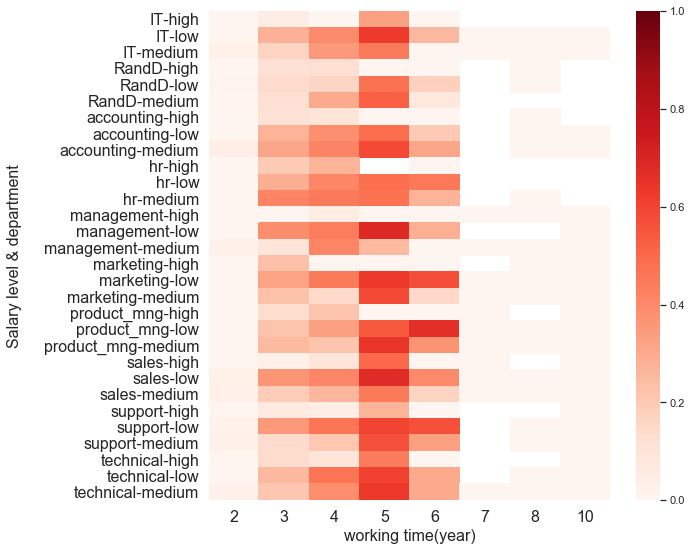

In [38]:
sns.set(style='white')
plt.rcParams['axes.unicode_minus']=False             #显示负号
plt.rcParams['figure.figsize'] = (9.0, 9.0)                      #调整图片大小
piv_tb = pd.pivot_table(df, values="left", index=["department", "salary"], 
                      columns=["time_spend_company"],aggfunc=np.mean)
sns.heatmap(piv_tb, vmin=0, vmax=1, cmap=sns.color_palette('Reds', n_colors=256))
sns.set_context(font_scale=4.5)
plt.xticks(fontsize=16, rotation=0)                          #设置x轴刻度值的字体大小
plt.yticks(fontsize=16, rotation=0)                          #设置y轴刻度值的字体大小
plt.xlabel('working time(year)', fontsize=16)
plt.ylabel('Salary level & department\n', fontsize=16)
plt.show()

In [39]:
# 对比不同部门，不同薪资水平，做过不同项目数量的员工离职率，代码如下：

piv_tb=pd.pivot_table(df, values="left",index=["department","salary"],
                      columns=["number_project"],aggfunc=np.mean)
piv_tb

number_project             2         3         4         5         6    7
department  salary                                                       
IT          high    0.250000  0.000000  0.000000  0.105263  0.000000  NaN
            low     0.672727  0.000000  0.099379  0.290076  0.777778  1.0
            medium  0.593750  0.012048  0.042424  0.127907  0.651163  1.0
RandD       high    0.600000  0.000000  0.000000  0.125000  0.000000  NaN
            low     0.511111  0.000000  0.058252  0.205479  0.333333  1.0
            medium  0.540541  0.026087  0.075472  0.182927  0.238095  1.0
accounting  high    0.500000  0.000000  0.000000  0.000000  0.250000  NaN
            low     0.718750  0.022989  0.125000  0.127273  0.677419  1.0
            medium  0.759259  0.000000  0.159091  0.250000  0.741935  1.0
hr          high    0.600000  0.000000  0.000000  0.000000  0.750000  NaN
            low     0.767857  0.040404  0.166667  0.222222  0.555556  1.0
            medium  0.797468  0.028037  0.148515  0.272727  0.625000  1.0
management  high    0.000000  0.000000  0.000000  0.000000  0.062500  NaN
            low     0.843750  0.000000  0.180328  0.259259  0.733333  1.0
            medium  0.400000  0.036364  0.023810  0.066667  0.545455  1.0
marketing   high    0.642857  0.000000  0.000000  0.000000  0.000000  NaN
            low     0.762500  0.010638  0.153226  0.234375  0.666667  1.0
            medium  0.583333  0.017094  0.045045  0.212121  0.411765  1.0
product_mng high    0.500000  0.000000  0.000000  0.000000  0.333333  NaN
            low     0.506173  0.000000  0.075188  0.329545  0.406250  1.0
            medium  0.716667  0.000000  0.085714  0.310811  0.242424  1.0
sales       high    0.136364  0.000000  0.021505  0.075472  0.142857  1.0
            low     0.744344  0.018367  0.142857  0.341902  0.593220  1.0
            medium  0.573123  0.013566  0.063315  0.118211  0.438462  1.0
support     high    0.285714  0.000000  0.000000  0.088235  0.200000  NaN
            low     0.788546  0.036900  0.095847  0.323529  0.767241  1.0
            medium  0.504587  0.021429  0.074830  0.194872  0.490566  1.0
technical   high    0.482759  0.042857  0.000000  0.125000  0.333333  NaN
            low     0.690821  0.032738  0.110048  0.211207  0.647887  1.0
            medium  0.636905  0.023256  0.131661  0.248963  0.587629  1.0

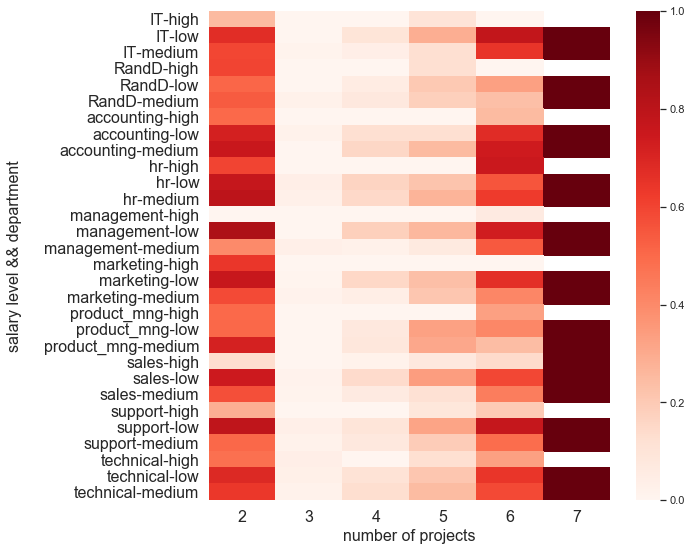

In [40]:
sns.set(style='white')
plt.rcParams['axes.unicode_minus']=False             #显示负号
plt.rcParams['figure.figsize'] = (9.0, 9.0)          #调整图片大小
piv_tb=pd.pivot_table(df, values="left",index=["department","salary"],
                      columns=["number_project"],aggfunc=np.mean)
sns.heatmap(piv_tb, vmin=0, vmax=1, cmap=sns.color_palette('Reds', n_colors=256))
sns.set_context(font_scale=4.5)
plt.xticks(fontsize=16, rotation=0)                   #设置x轴刻度值的字体大小
plt.yticks(fontsize=16, rotation=0)                   #设置y轴刻度值的字体大小
plt.xlabel('number of projects', fontsize=16)
plt.ylabel('salary level && department\n', fontsize=16)
plt.savefig("Pivottables - dimission rates for different departments, different salary levels, and different number of items",bbox_inches = 'tight')
plt.show()

上图深颜色是平均离职率较高的情况，浅颜色是平均离职率较低的情况。显而易见，7个项目的人员是离职高危人群，需要重点关注。



（3）分组分析——对部门分组，看不同部门、不同薪资水平下的离职率

这里的分组分析属于向下钻取，即向下根据“部门（department）“钻取。

代码如下：

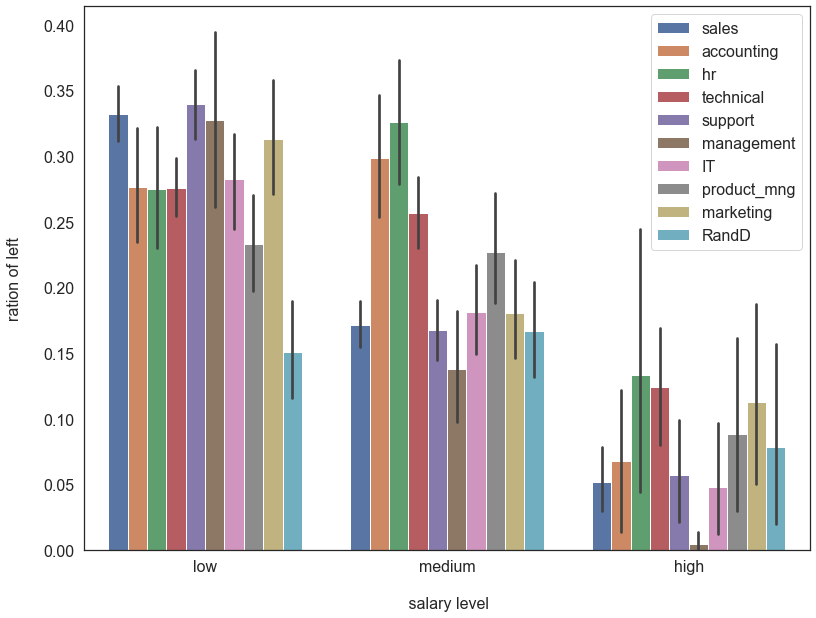

In [41]:
plt.rcParams['figure.figsize'] = (13.0, 10.0)                      #调整图片大小
piv_tb=pd.pivot_table(df, values="left",index=["department","salary"],
                      columns=["number_project"],aggfunc=np.mean)
sns.barplot(x="salary",y="left",hue="department",data=df)
plt.xticks(fontsize=16, rotation=0)                          #设置x轴刻度值的字体大小
plt.yticks(fontsize=16, rotation=0)                          #设置y轴刻度值的字体大小
plt.xlabel('\n salary level', fontsize=16)
plt.ylabel('ration of left\n', fontsize=16)
plt.legend(fontsize=16)
plt.savefig("Pivottables - dimission rates for different departments and salary levels ",bbox_inches = 'tight')
plt.show()

根据上图，有如下结论：

1）sales、technical、support、management、IT、marketing这些部门的离职率和它的工资是有关系的, 收入越高，离职率越低；

2）薪资在中等收入水平（medium）,‘hr’部门的离职率最高。



当然，分组分析也可以直接看不同部门的离职率，代码如下：

In [42]:
sub_df_2=df.loc[:,["left","department"]]
sub_df_2.groupby("department").mean().sort_values(by="left", ascending=False)

,left
department,
hr,0.290934
accounting,0.265971
technical,0.256250
support,0.248991
sales,0.244928
marketing,0.236597
IT,0.222494
product_mng,0.219512
RandD,0.153748


这里显示‘hr’部门的离职率最高，‘management’部门的离职率最低。

还可以直接看不同部门的满意度，代码如下：

In [43]:
sub_df_1=df.loc[:,["satisfaction_level","department"]]
sub_df_1.groupby("department").mean().sort_values(by="satisfaction_level", ascending=False)

,satisfaction_level
department,
management,0.621349
RandD,0.619822
product_mng,0.619634
marketing,0.618601
support,0.618300
IT,0.618142
sales,0.614447
technical,0.607897
hr,0.598809


上图显示满意度最高的部门是‘management’,最低的部门是‘accounting’。

（4）相关分析——皮尔逊相关系数

用皮尔逊相关系数衡量两种连续属性的相关性大小。

代码如下：

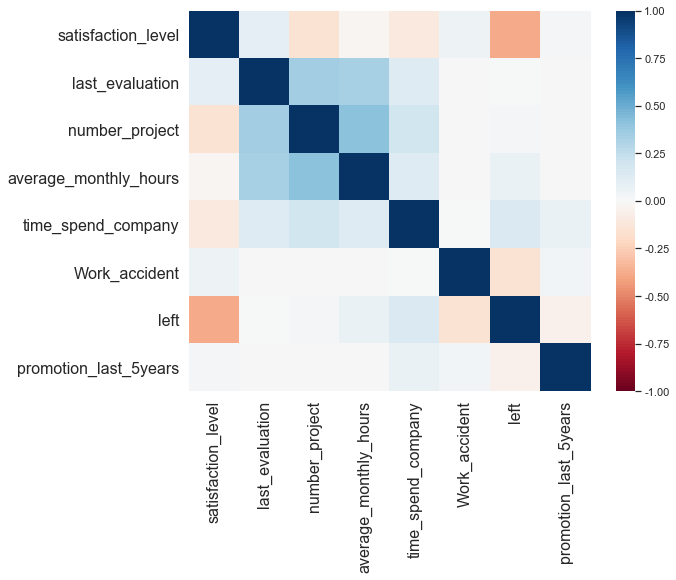

In [44]:
plt.rcParams['figure.figsize'] = (9.0, 7.0)                      #调整图片大小
sns.heatmap(df.corr(),vmin=-1, vmax=1, cmap=sns.color_palette("RdBu", n_colors=128))
sns.set_context(font_scale=6.5)
plt.xticks(fontsize=16, rotation=90)                            #设置x轴刻度值的字体大小
plt.yticks(fontsize=16, rotation=0)                             #设置y轴刻度值的字体大小
plt.savefig("各连续属性的相关分析.png",bbox_inches = 'tight')
plt.show()

图中蓝色代表正相关，红色代表负相关，白色代表不相关。

由图可见：

1）last_evaluation 和 left 不相关；

2）last_evaluation、number_project、average_monthly_hours 三个属性有很强的正相关性；

3）satisfaction_level 和 left 有很强的负相关性。

当然，图中还有其他的一些结果。这里先不讨论了。以上的1）、2）点结论在特征选择中将用到。

7.特征工程
特征工程是为了下一步的建模做准备。

（1）数据清洗

数据清洗包含去除异常值和抽样。因为这里的样本量比较少，只有15002条。同时由于抽样要尽量保持全量数据，所以我们这里不进行抽样了，只是去除异常值。

根据单因子探索分析的结果，可知代码如下：

In [45]:
df=df.dropna(subset=["satisfaction_level"])     # 清洗数据
df=df[df["satisfaction_level"]<=1][df["salary"]!="nme"]

2）得到标注Y

标注是left。于是代码如下：

In [46]:
label = df["left"]
df = df.drop("left", axis=1)

当时我们的结论包含如下两点：

1）last_evaluation 和 left 不相关；

2）last_evaluation、number_project、average_monthly_hours 三个属性有很强的正相关性。

所以，last_evaluation、number_project、average_monthly_hours 三个属性可以去掉。但考虑到这里的属性不多，所以把这三个属性保留下来。



（4）特征处理

下面一个一个属性来分析：

1）satisfaction_level

这个属性取值在0.09~1之间，因为它最小没取到0，所以我们可以对它归一化处理。当然也可以标准化。值得一提的是，不做任何处理也是可以的。但我们为了和下面的属性处理同步，故而对satisfaction_level 做归一化或是标准化处理。

In [47]:
# 归一化处理
from sklearn.preprocessing import MinMaxScaler
df['satisfaction_level'] = \
                MinMaxScaler().fit_transform(df['satisfaction_level'].values.reshape(-1,1)).reshape(1,-1)[0]
df['satisfaction_level'].head(5)

0    0.318681
1    0.780220
2    0.021978
3    0.692308
4    0.307692
Name: satisfaction_level, dtype: float64

In [48]:
# 标准化处理
from sklearn.preprocessing import StandardScaler
df['satisfaction_level'] = StandardScaler().fit_transform(df['satisfaction_level'].values.reshape(-1,1)).reshape(1,-1)[0]
df['satisfaction_level'].head(5) 

0   -0.936495
1    0.752814
2   -2.022479
3    0.431041
4   -0.976716
Name: satisfaction_level, dtype: float64

因为标准化是将数据缩放到均值为0，标准差为1的尺度上，所以这里看到有负数出现。

2）last_evaluation

该属性取值范围为0.36~0.99，对它的特征处理方式同上，要么归一化化，要么标准化。代码见satisfaction_level 部分。

3）number_project

属性 number_project 取值是不大于10的整数，同样采取归一化或标准化处理，使这个属性的信息量尽可能多的保留下来。代码见satisfaction_level 部分。

4）average_monthly_hours

average_monthly_hours 是一个整数，并且覆盖的范围比较大，我们可以采用离散化的方式把数据进行分箱。但由于数据只有14999条（清洗后），不是很多，所以我们暂时不考虑分箱或是离散化，直接保留它所有的信息。保留所有的信息可能对于模型来说不是最准确的，但这里数据少，我们暂时保留所有信息。处理方式和前面一样，归一化或者标准化。代码见satisfaction_level 部分。

5）time_spend_company

属性 time_spend_company 取值不大于10的整数，同样采取归一化或标准化处理。代码见satisfaction_level 部分。

6）Work_accident

Work_accident取值是0或1，对它归一化就是它本身，也可以对它标准化。代码见satisfaction_level 部分。

7）promotion_last_5years

promotion_last_5years取值是0或1，对它归一化就是它本身，也可以对它标准化。代码见satisfaction_level 部分。

8）department

这是一个离散值，而且是定类数据，对它采取标签化（Labelencoder）或独热编码（One-hot encoder），代码分别如下：

Labelencoder：

In [49]:
from sklearn.preprocessing import LabelEncoder
df['department'] = LabelEncoder().fit_transform(df['department'])

标签化之后还需一步归一化。

One-hot encoder:

In [50]:
# df = pd.get_dummies(df['department'])
# print(df)

9) salary

salary因为是一个离散值，所以它的处理方式和department一致，可以标签化，也可以独热编码。只是需要注意一点：在Labelencoder时，是根据首字母大小来标签化，比如high的首字母在low和medium前面，所以它标签化后被标签为0，而low被标签为1。这就不满足该定序属性原先的信息。所以这里需要单独写一个函数，指定将low、medium、high分别标签为0、1、2：

In [51]:
d = dict([("low",0),("medium",1),("high",2)])     
df['salary'] = [d.get(s,0) for s in df["salary"].values]

这样所有的特征属性都处理完了，最后提醒一点：

在这里可以尝试将连续和离散属性统一处理，比如所有连续属性统一归一化，或者统一标准化。

8.建模与模型评估
（1）划分数据集

通过以下代码，将训练集、验证集、测试集的比例设置为6:2:2。

In [52]:
from sklearn.model_selection import train_test_split
f_v = features.values                                                                        #提取X的values
l_v = label.values                                                                           #提取Y的values
X_tt, X_test, Y_tt, Y_test = train_test_split(f_v, l_v, random_state=0, test_size=0.2)       #设定测试集为2/10
X_train, X_validation, Y_train, Y_validation = train_test_split(X_tt, Y_tt, random_state=1, test_size=0.25)  #设定训练集：验证集 = 3:1
print(len(X_train),len(X_validation), len(X_test)) 

NameError: name 'features' is not defined